In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

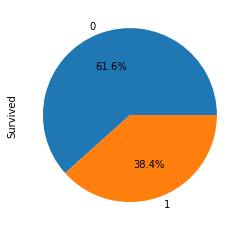

In [3]:
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

In [4]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

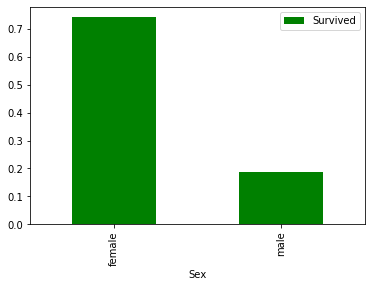

In [9]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(color=['g'])

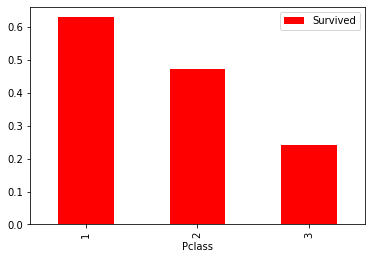

In [16]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(color=['r','g','b'])

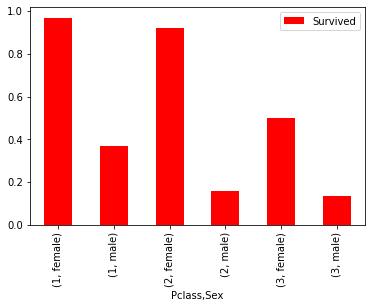

In [18]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar(color = ['r','g','b'])

In [27]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [10]:
train_data.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [3]:
Titanic['Title'] = Titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master'], 'Master'))
Titanic['Title'] = Titanic['Title'].map(title_Dict)
title_dummies_df = pd.get_dummies(Titanic['Title'], prefix=Titanic[['Title']].columns[0])
Titanic = pd.concat([Titanic,title_dummies_df],axis=1)


NameError: name 'titanic' is not defined

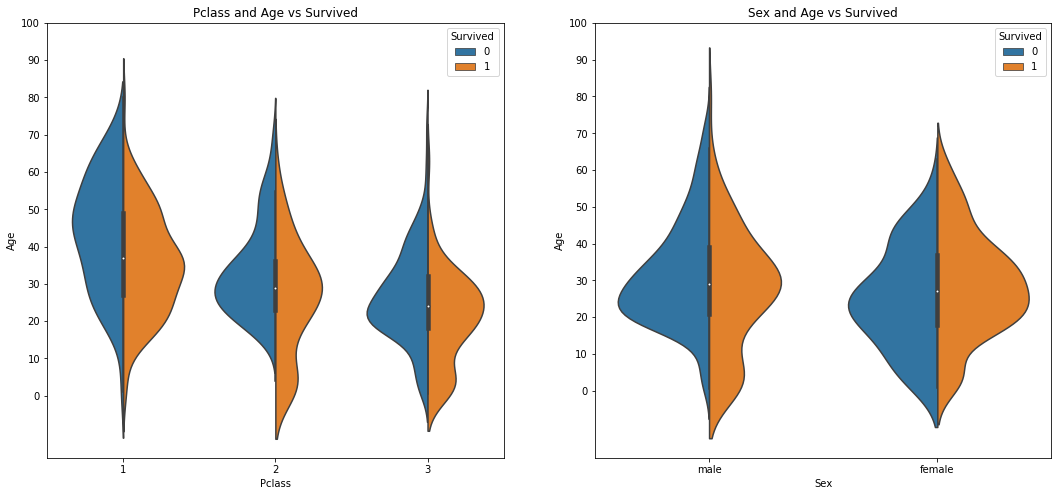

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Text(0.5, 1.0, 'Embarked and Survived')

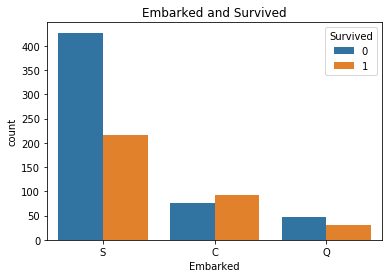

In [20]:
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')

Text(0.5, 1.0, 'SibSp and Survived')

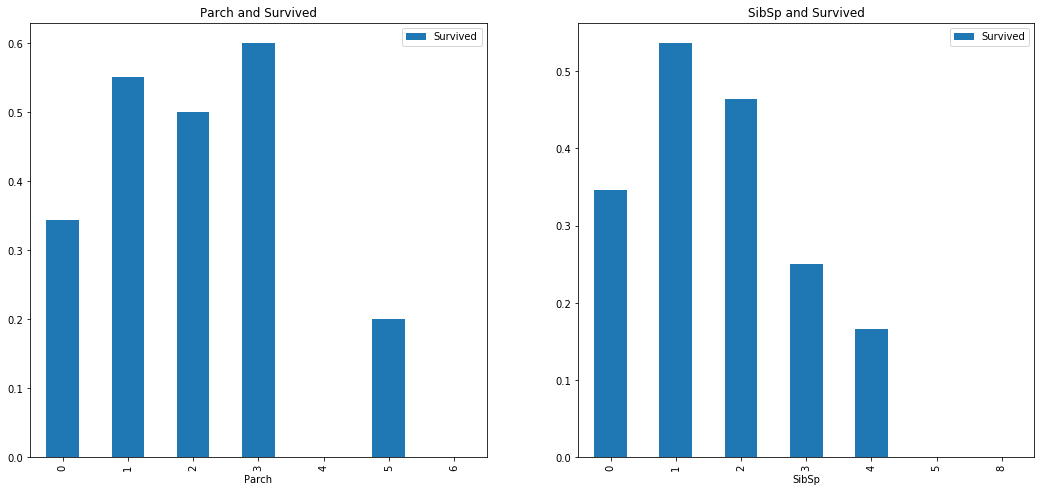

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')#父母子女
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')#兄弟姐妹

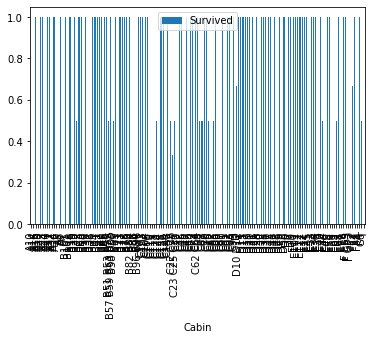

In [29]:
train_data[['Cabin','Survived']].groupby(['Cabin']).mean().plot.bar()

In [14]:
    train_data_org = pd.read_csv('train.csv')
    test_data_org = pd.read_csv('test.csv')
    test_data_org['Survived'] = 0
    combined_train_test = train_data_org.append(test_data_org)

D:\Users\WYG\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [15]:
    if combined_train_test['Embarked'].isnull().sum() != 0:
        combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [16]:
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [17]:
    sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
    combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

In [19]:
    combined_train_test['Title'] = combined_train_test['Name'].extract('.+,(.+)').extract( '^(.+?)\.').strip()

AttributeError: 'Series' object has no attribute 'extract'

In [20]:
    if combined_train_test['Fare'].isnull().sum() != 0:
        combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform('mean'))

In [21]:
    combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
    combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
    combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [24]:
    def fare_category(fare):
        if fare <= 4:
            return 0
        elif fare <= 10:
            return 1
        elif fare <= 30:
            return 2
        elif fare <= 45:
            return 3
        else:
            return 4
combined_train_test['Fare_Category'] = combined_train_test['Fare'].map(fare_category)

In [25]:
    fare_cat_dummies_df = pd.get_dummies(combined_train_test['Fare_Category'],prefix=combined_train_test[['Fare_Category']].columns[0])
    combined_train_test = pd.concat([combined_train_test, fare_cat_dummies_df], axis=1)

In [26]:
    Pclass_1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
    Pclass_2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
    Pclass_3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]
    # 建立Pclass_Fare Category
    combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(Pclass_1_mean_fare, Pclass_2_mean_fare, Pclass_3_mean_fare), axis=1)
    p_fare = LabelEncoder()
    p_fare.fit(np.array(['Pclass_1_Low_Fare', 'Pclass_1_High_Fare', 'Pclass_2_Low_Fare', 'Pclass_2_High_Fare', 'Pclass_3_Low_Fare','Pclass_3_High_Fare']))#给每一项添加标签
    combined_train_test['Pclass_Fare_Category'] = p_fare.transform(combined_train_test['Pclass_Fare_Category'])#转换成数值

NameError: name 'pclass_fare_category' is not defined

In [27]:
    combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
    combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)
    le_family = LabelEncoder()
    le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
    combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])
    fam_size_cat_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                             prefix=combined_train_test[['Family_Size_Category']].columns[0])
    combined_train_test = pd.concat([combined_train_test, fam_size_cat_dummies_df], axis=1)

NameError: name 'family_size_category' is not defined

In [28]:
    missing_age_df = pd.DataFrame(combined_train_test[['Age', 'Parch', 'Sex', 'SibSp', 'Family_Size', 'Family_Size_Category',
                             'Title', 'Fare', 'Fare_Category', 'Pclass', 'Embarked']])
    missing_age_df = pd.get_dummies(missing_age_df,columns=['Title', 'Family_Size_Category', 'Fare_Category', 'Sex', 'Pclass' ,'Embarked'])
    missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
    missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

KeyError: "['Family_Size_Category', 'Title'] not in index"

In [29]:
    def fill_missing_age(missing_age_train, missing_age_test):
        missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
        missing_age_Y_train = missing_age_train['Age']
        missing_age_X_test = missing_age_test.drop(['Age'], axis=1)
        #模型1
        gbm_reg = ensemble.GradientBoostingRegressor(random_state=42)
        gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [3],'learning_rate': [0.01], 'max_features': [3]}
        gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1,  scoring='neg_mean_squared_error')
        gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
        print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
        print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
        print('GB Train Error for "Age" Feature Regressor:'+ str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
        missing_age_test['Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
        print(missing_age_test['Age_GB'][:4])
        #模型2
        lrf_reg = LinearRegression()
        lrf_reg_param_grid = {'fit_intercept': [True], 'normalize': [True]}
        lrf_reg_grid = model_selection.GridSearchCV(lrf_reg, lrf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
        lrf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
        print('Age feature Best LR Params:' + str(lrf_reg_grid.best_params_))
        print('Age feature Best LR Score:' + str(lrf_reg_grid.best_score_))
        print('LR Train Error for "Age" Feature Regressor' + str(lrf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
        missing_age_test['Age_LRF'] = lrf_reg_grid.predict(missing_age_X_test)
        print(missing_age_test['Age_LRF'][:4])
       #将两个模型预测后的均值作为最终预测结果
        print('shape1',missing_age_test['Age'].shape,missing_age_test[['Age_GB','Age_LRF']].mode(axis=1).shape)
        #missing_age_test['Age'] = missing_age_test[['Age_GB','Age_LRF']].mode(axis=1)
        missing_age_test['Age'] = np.mean([missing_age_test['Age_GB'],missing_age_test['Age_LRF']])
        print(missing_age_test['Age'][:4])
        drop_col_not_req(missing_age_test, ['Age_GB', 'Age_LRF'])

        return missing_age_test

In [30]:
    combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train,missing_age_test)

NameError: name 'missing_age_train' is not defined

In [31]:
    def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
        # 随机森林
        rf_est = RandomForestClassifier(random_state=42)
        rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
        rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
        rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
        #将feature按Importance排序
        feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
        features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
        print('Sample 25 Features from RF Classifier')
        print(str(features_top_n_rf[:25]))

        # AdaBoost
        ada_est = ensemble.AdaBoostClassifier(random_state=42)
        ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.5, 0.6]}
        ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
        ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
        #排序
        feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),'importance': ada_grid.best_estimator_.feature_importances_}).sort_values( 'importance', ascending=False)
        features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']

        # ExtraTree
        et_est = ensemble.ExtraTreesClassifier(random_state=42)
        et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [15]}
        et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
        et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
        #排序
        feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
        features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
        print('Sample 25 Features from ET Classifier:')
        print(str(features_top_n_et[:25]))

        # 将三个模型挑选出来的前features_top_n_et合并
        features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()

        return features_top_n

In [32]:
    feature_to_pick = 250
    feature_top_n = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
    titanic_train_data_X = titanic_train_data_X[feature_top_n]
    del titanic_train_data_X['Ticket_Number']#后来发现删除Ticket_Number后效果更好了
    titanic_test_data_X = titanic_test_data_X[feature_top_n]
    del titanic_test_data_X['Ticket_Number']

NameError: name 'titanic_train_data_X' is not defined

In [33]:
    rf_est = ensemble.RandomForestClassifier(n_estimators = 750, criterion = 'gini', max_features = 'sqrt',
                                             max_depth = 3, min_samples_split = 4, min_samples_leaf = 2,
                                             n_jobs = 50, random_state = 42, verbose = 1)
    gbm_est = ensemble.GradientBoostingClassifier(n_estimators=900, learning_rate=0.0008, loss='exponential',
                                                  min_samples_split=3, min_samples_leaf=2, max_features='sqrt',
                                                  max_depth=3, random_state=42, verbose=1)
    et_est = ensemble.ExtraTreesClassifier(n_estimators=750, max_features='sqrt', max_depth=35, n_jobs=50,
                                           criterion='entropy', random_state=42, verbose=1)
    voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est)],
                                       voting = 'soft', weights = [3,5,2],
                                       n_jobs = 50)
    voting_est.fit(titanic_train_data_X,titanic_train_data_Y)

NameError: name 'ensemble' is not defined

In [34]:
    titanic_test_data_X['Survived'] = voting_est.predict(titanic_test_data_X)
    submission = pd.DataFrame({'PassengerId':test_data_org.loc[:,'PassengerId'],
                               'Survived':titanic_test_data_X.loc[:,'Survived']})
    submission.to_csv('submission_result.csv',index=False,sep=',')

NameError: name 'voting_est' is not defined